In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
preds = pd.read_csv("preds.csv")
labels = preds["labels"].to_numpy()

In [3]:
distribution = np.array([np.random.laplace(0.1, 0.15) if label == 0 else np.random.laplace(0.6, 0.2) for label in labels])
distribution = np.where(distribution > 1, 1, distribution)
distribution = np.where(distribution < 0, 0, distribution)

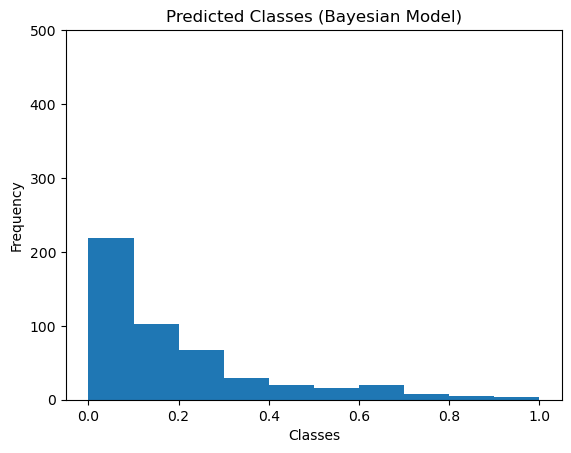

In [4]:
plt.hist(distribution, bins=10)
plt.title("Predicted Classes (Bayesian Model)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.ylim(0, 500)
plt.show()
print()

0.9566848154869934


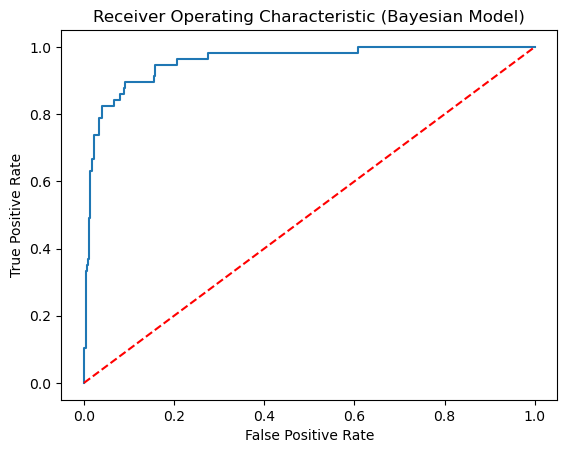

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fp, tp, thresholds = roc_curve(labels, distribution)
print(auc(fp, tp))

plt.plot(fp, tp)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Bayesian Model)")
plt.show()

In [7]:
rounded = np.round(distribution)

In [8]:
correct = (rounded == labels)
accuracy = correct.sum() / correct.size
accuracy

0.9471544715447154

In [9]:
bayesian_preds = pd.DataFrame({
    "preds": distribution,
    "labels": labels
})
bayesian_preds.to_csv("bayesian_preds.csv")